# Logistic Regression

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

In [302]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

# EDA

In [303]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

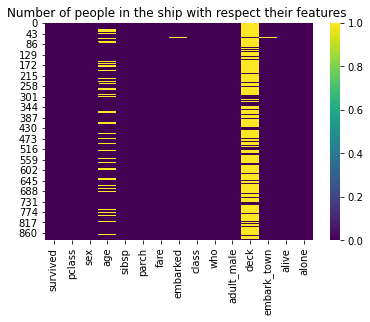

In [304]:
# To see the Null values

sns.heatmap(titanic.isnull(), cbar = True, cmap = 'viridis') #cmap is color
plt.title('Number of people in the ship with respect their features ')
plt.show()

In [305]:
# % of Null values

titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

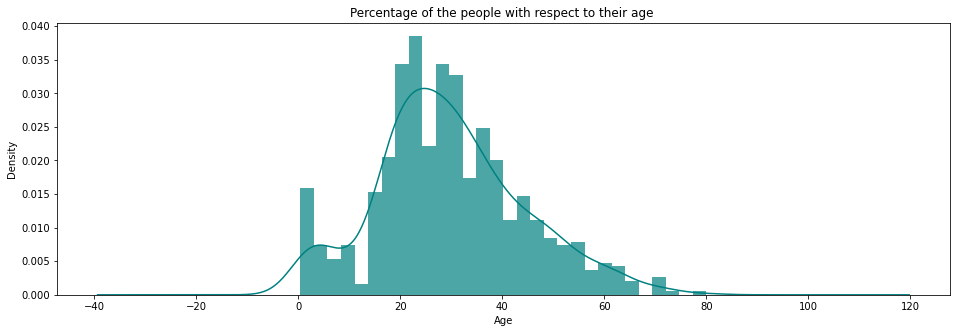

In [306]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))

titanic['age'].plot(kind = 'density', color = 'teal')

ax.set_xlabel('Age')

plt.title('Percentage of the people with respect to their age ')

plt.show()

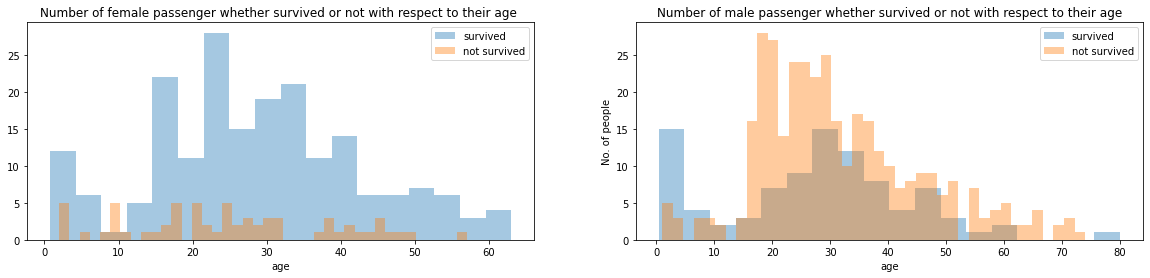

In [307]:
# we plotted female survived & not survived passengers and aslo male survived & 
# not survived passengers with respect to their age.

survived = 'survived'
not_survived = 'not survived'


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']


ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Number of female passenger whether survived or not with respect to their age ')


ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Number of male passenger whether survived or not with respect to their age')


plt.ylabel('No. of people')
plt.show()

In [308]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

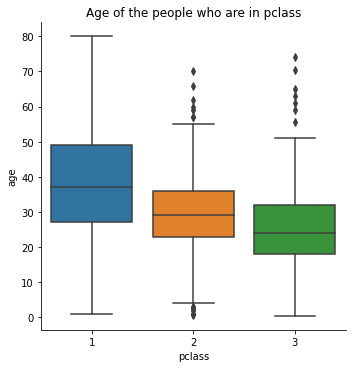

In [309]:
# Let’s observe the people with respect to thier age who are in pclass. We will get this by using catplot() function.

sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')
plt.title('Age of the people who are in pclass')
plt.show()

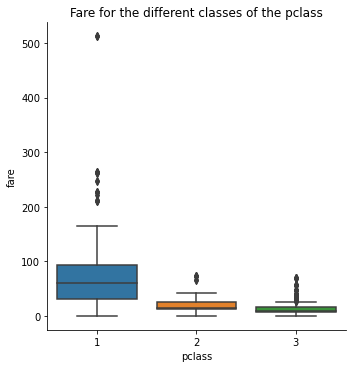

In [310]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'box')
plt.title('Fare for the different classes of the pclass')
plt.show()

In [311]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [312]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [313]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

# Imputation

In [314]:
def impute_age(cols):
    
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [315]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis = 1)

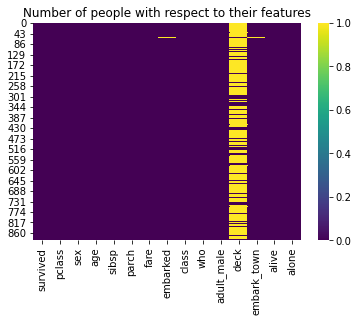

In [316]:
sns.heatmap(titanic.isnull(), cbar = True, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

#now we can see that NO null values in age.

# Analysing 'Embarked' Feature

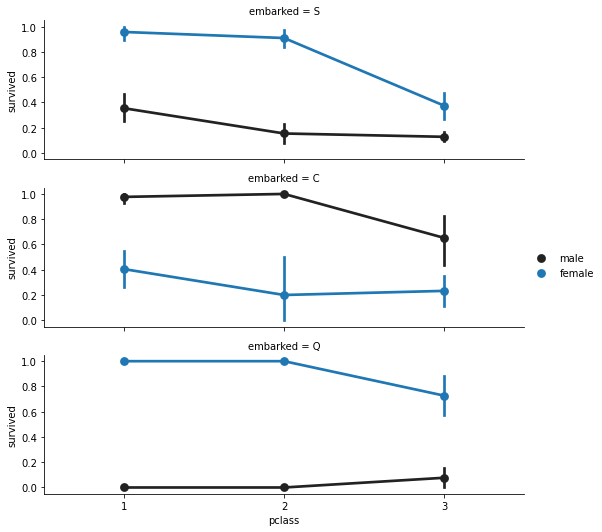

In [317]:
f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()
plt.show()

# Didn't understand the below plot, even from the video description. 

In [318]:
titanic['embarked'].isnull().sum()

2

In [319]:
titanic['embark_town'].value_counts()

# we can see that majority of ppl have boarded from Southampton hence we can map 'S' for 2 missing values in 'Embarked' feature

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [320]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

In [321]:
titanic['embarked'].isnull().sum()

0

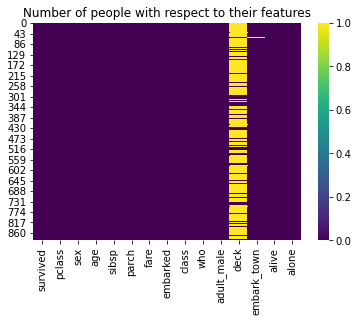

In [322]:
sns.heatmap(titanic.isnull(), cbar = True, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

# Null value is gone for Embarked.

In [323]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

# deck has lot of Null values so we drop that column
# embark_city is just the desc of 'embarked' feature, hence we can drop this
# alive is actually the desc of target variable, hence we should not have that in training data. hence dropped. 

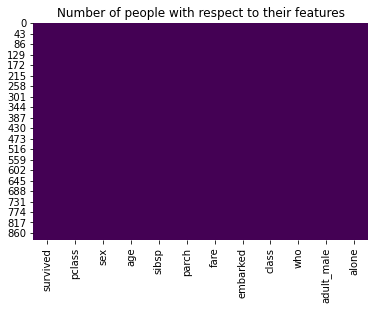

In [324]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

# now the features are without NULL and perfect.

In [325]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [326]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  alone  
0    man        True  False  
1  woman       False  False  
2  woman       False   True  
3  woman       False  False  
4    man        True   True

In [327]:
titanic['fare'] = titanic['fare'].astype('int') # decimal value doesn't matter much, so converted to int
titanic['age'] = titanic['age'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int64   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int64(6), object(3)
memory usage: 65.5+ KB


In [328]:
titanic.head()

survived  pclass     sex  age  sibsp  parch  fare embarked  class    who  \
0         0       3    male   22      1      0     7        S  Third    man   
1         1       1  female   38      1      0    71        C  First  woman   
2         1       3  female   26      0      0     7        S  Third  woman   
3         1       1  female   35      1      0    53        S  First  woman   
4         0       3    male   35      0      0     8        S  Third    man   

   adult_male  alone  
0        True  False  
1       False  False  
2       False   True  
3       False  False  
4        True   True

# Convert categorical data into numerical data

In [329]:
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

who = {'man': 0, 'women': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

adult_male = {True: 1, False: 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

alone = {True: 1, False: 0}
titanic['alone'] = titanic['alone'].map(alone)            

ports = {'S': 0, 'C': 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'].map(ports)  

titanic.head()

survived  pclass  sex  age  sibsp  parch  fare  embarked  class  who  \
0         0       3    0   22      1      0     7         0  Third  0.0   
1         1       1    1   38      1      0    71         1  First  NaN   
2         1       3    1   26      0      0     7         0  Third  NaN   
3         1       1    1   35      1      0    53         0  First  NaN   
4         0       3    0   35      0      0     8         0  Third  0.0   

   adult_male  alone  
0           1      0  
1           0      0  
2           0      1  
3           0      0  
4           1      1

In [330]:

'''
Q: Hello Laxmi, one quick question..while converting the categorical data into numerical, you have given men =0, women = 1 and children =2. I understand that you have seen the survival rate and given the numbers in such a way. However, for Class, we know that 3rd class passengers least survived, but they have highest value of 3. Do you think we need to change values of 3 class to 0, 2nd class to 1 and 1st class to 3. Pls help me to understand.

A: Please accept my sincere apologies. I had made a little mistake there. That should have been encoded with One Hot Encoding Technique instead of Label Encode which we do for output variable. Men, women, and children should have been treated equal. Please use One Hot Encoding. Otherwise rest of the tutorial is perfect. Thanks for watching.
Also the “embarked” column should have been encoded with one hot encoding as well

'''

'\nQ: Hello Laxmi, one quick question..while converting the categorical data into numerical, you have given men =0, women = 1 and children =2. I understand that you have seen the survival rate and given the numbers in such a way. However, for Class, we know that 3rd class passengers least survived, but they have highest value of 3. Do you think we need to change values of 3 class to 0, 2nd class to 1 and 1st class to 3. Pls help me to understand.\n\nA: Please accept my sincere apologies. I had made a little mistake there. That should have been encoded with One Hot Encoding Technique instead of Label Encode which we do for output variable. Men, women, and children should have been treated equal. Please use One Hot Encoding. Otherwise rest of the tutorial is perfect. Thanks for watching.\nAlso the “embarked” column should have been encoded with one hot encoding as well\n\n'

In [331]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace= True)
titanic.head()

survived  pclass  sex  age  sibsp  parch  fare  embarked  adult_male  alone
0         0       3    0   22      1      0     7         0           1      0
1         1       1    1   38      1      0    71         1           0      0
2         1       3    1   26      0      0     7         0           0      1
3         1       1    1   35      1      0    53         0           0      0
4         0       3    0   35      0      0     8         0           1      1

# Build Logistic Regression Model

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [333]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 

model = LogisticRegression(solver= 'lbfgs', max_iter = 200)
# The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers.

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

model.score(X_test, y_test) 

# not sure why X_test is used here, as i know it should be y_test, y_predict. 
# have posted the query in youtube also.
# If i try to give as model.score(y_test, y_predict) im getting some error. Need to understand and fix that also. 

0.8271186440677966

# Recursive Feature Elimination :

In [334]:
from sklearn.feature_selection import RFE

In [335]:
model = LogisticRegression(solver='lbfgs', max_iter=500)

rfe = RFE(model, 5, verbose=1)

rfe = rfe.fit(X, y)

rfe.support_

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


/Users/yogesh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([ True, False, False,  True,  True, False, False,  True,  True])

In [336]:
X.head()

pclass  sex  age  sibsp  parch  fare  embarked  adult_male  alone
0       3    0   22      1      0     7         0           1      0
1       1    1   38      1      0    71         1           0      0
2       3    1   26      0      0     7         0           0      1
3       1    1   35      1      0    53         0           0      0
4       3    0   35      0      0     8         0           1      1

In [337]:
XX = X[X.columns[rfe.support_]]

In [338]:
XX.head()

# Below are the features suggested by RFE.

pclass  sibsp  parch  adult_male  alone
0       3      1      0           1      0
1       1      1      0           0      0
2       3      0      0           0      1
3       1      1      0           0      0
4       3      0      0           1      1

In [339]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)

# stratify = y means even the target value will be split between train and test as per the test_size given i.e here
# y_triain will have 80% and y_test will have 20% data. 

In [341]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

model.score(X_test, y_test)

# not sure why X_test is used here, as i know it should be y_test, y_predict. 
# have posted the query in youtube also.

0.8547486033519553

# Performance Metrics

In [401]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [402]:
print("Confusion Matrix :")
confusion_matrix(y_test,y_predict)

Confusion Matrix :


array([[99, 11],
       [15, 54]])

In [403]:
print("Accuracy Score:", accuracy_score(y_test, y_predict)) 

# how often classifier is correct ? it's 85.47%
# also called as Classfication Accuracy

Accuracy Score: 0.8547486033519553


In [404]:
print("Missclassfication Rate:", 1 - accuracy_score(y_test, y_predict)) 

# how often classifier is not correct ? it's 14.52%
# also called as Classification Error or Missclassfication Rate

Missclassfication Rate: 0.14525139664804465


In [405]:
print("Recall Score:", recall_score(y_test, y_predict))

# Also called as Sensitivity or True Positive Rate 
# How sensitive is the classifier to detect the true positive instances ?

Recall Score: 0.782608695652174


In [406]:
print("Precision Score:", precision_score(y_test, y_predict))

# When a +ve value is predicted, how often the prediction is correct ?
# How 'precise' is the classifier when predicting +ve instances

# It's 83.07%

Precision Score: 0.8307692307692308


In [407]:
print("f1 Score:", f1_score(y_test, y_predict)) 

f1 Score: 0.8059701492537313


In [408]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       110
           1       0.83      0.78      0.81        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



# Null Accuracy

In [409]:
'''

Null Accuracy: Accuracy that could be achieved by always predicting the most frequent class.

If the accuracy of the model is almost equal to Null Accuracy of the model then model is just predicting the
most frequency target value. This is not a good prediction. The above actual accuracy (which is also called 
as classification accuracy) doesn't provides this clarity hence its one of the drawback of classification Accuracy.
'''

"\n\nNull Accuracy: Accuracy that could be achieved by always predicting the most frequent class.\n\nIf the accuracy of the model is almost equal to Null Accuracy of the model then model is just predicting the\nmost frequency target value. This is not a good prediction. The above actual accuracy (which is also called \nas classification accuracy) doesn't provides this clarity hence its one of the drawback of classification Accuracy.\n"

In [410]:
y_test.value_counts()

0    110
1     69
Name: survived, dtype: int64

In [411]:
# calculate % of 1's

y_test.mean()

0.3854748603351955

In [412]:
# calculate % of 0's

1-y_test.mean()

0.6145251396648045

In [413]:
# Calculate the Null Accuracy (this method works only for binary classification prob i.e output having only 2 type
# of values)

max(y_test.mean(), 1-y_test.mean())

0.6145251396648045

In [414]:
# To calculate Null Accuracy for multi-class classification problem
# This is shown here just for future reference.

y_test.value_counts().head(1)/len(y_test)

0    0.614525
Name: survived, dtype: float64

In [415]:
#In this use case we can see, Classification Accuracy is 85% and Null Accuracy is 61% so model is not so bad.

# Changing the Threshold

In [416]:
model.predict(X_test)[0:5]

# sample first 10 rows prediction by model

array([1, 1, 0, 0, 0])

In [417]:
y_predict_prob = model.predict_proba(X_test)[0:5, :]
y_predict_prob

#below gives the probability of tagging the survival value as 0 or 1. 
# This is calculated for each row of the data i.e each test sample
# for 1st sample there is 0.44433168 probability that survaival = 0 and 0.55566832 probability that survaival = 1
# By default model uses 0.5 as threshold to decide the class or output as 1. Hence we can see in above cell that 
# first and second result is 1 because 0.55566832> 0.5 and 0.87213996 > 0.5 whereas third result is 0 because 
# 0.09376084 < 0.5
# we can change this threshold as well as part of further tuning to get more +ve's or more -ve's as per use case
# requirement. 

array([[0.44433168, 0.55566832],
       [0.12786004, 0.87213996],
       [0.90623916, 0.09376084],
       [0.90623916, 0.09376084],
       [0.62003092, 0.37996908]])

In [418]:
y_predict_prob = model.predict_proba(X_test)[:,1] 
# keep probabilities for the positive outcome only, hence selecting 1st column, not 0th column

y_predict_prob[0:5]

array([0.55566832, 0.87213996, 0.09376084, 0.09376084, 0.37996908])

In [419]:
# this should be the last option to tune the model. Before deciding to change the threshold need to try for other
# optimization approaches i.e Feature scaling, FE etc.

In [420]:
# For our use case if a person is not survived and if we predict as survived then family will be in hope and later it
# will be a shock for them so for us its better to predict as not survived even though he/she has survived so that 
# even if family feels bad now, later they will become happy. we are not 

# So need to reduce False Positive i.e Need to increase the precision. 
# Even if False Negative is high thats fine i.e even if Recall/Sensitivity/TPR is low thats fine. 

#Below is current precision and recall score.

# Precision Score: 0.8307692307692308
# Recall Score: 0.782608695652174

In [421]:
# To achieve high precision, we need to shift the threshold > 0.5 

# if we wanted to achieve high recall then we would have reduced the threshold. 

In [422]:
from sklearn.preprocessing import binarize

In [423]:
y_predict_class = binarize(y_predict_prob.reshape(-1, 1), threshold = 0.8)

#reshape(-1, 1) is because binarize expects 2D array.

In [424]:
y_predict_class[0:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [425]:
y_predict_prob[0:10]

# we can see in above cell result that only when probabiity is >0.8 its categorized as 1.

array([0.55566832, 0.87213996, 0.09376084, 0.09376084, 0.37996908,
       0.68892605, 0.20115074, 0.09376084, 0.03049173, 0.20115074])

In [426]:
print(" Previous Confusion Matrix :")
confusion_matrix(y_test,y_predict)

 Previous Confusion Matrix :


array([[99, 11],
       [15, 54]])

In [427]:
print("Updated Confusion Matrix :")
confusion_matrix(y_test,y_predict_class)

# we can see that False +ve has dropped from 11 to 1
# we can see that False -ve has increased from 15 to 31

Updated Confusion Matrix :


array([[109,   1],
       [ 31,  38]])

In [428]:
print("Previous Precision Score:", precision_score(y_test, y_predict))
print("Updated Precision Score:", precision_score(y_test, y_predict_class))

# we can see that Precision has increased i.e False Positive has reduced. 

Previous Precision Score: 0.8307692307692308
Updated Precision Score: 0.9743589743589743


In [429]:
print("Previous Recall Score:", recall_score(y_test, y_predict))
print("Updated Recall Score:", recall_score(y_test, y_predict_class))

# we can see that recall has decreased i.e False Negative has increased. 

Previous Recall Score: 0.782608695652174
Updated Recall Score: 0.5507246376811594


In [430]:
# it will be difficult to change the threshold everytime and see the precision, recall hence ROC curve helps
# to see how the sensitivity and specificty is impacted for various thresholds.

# ROC AUC Curve

In [431]:
# Compute ROC

[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)


# fpr is false +ve rate,   tpr is true +ve rate and  thr is threshold. 

In [432]:
fpr[0:5], tpr[0:5], thr[0:5]

(array([0.        , 0.        , 0.        , 0.        , 0.00909091]),
 array([0.        , 0.07246377, 0.20289855, 0.24637681, 0.33333333]),
 array([1.94318445, 0.94318445, 0.92916807, 0.9222574 , 0.91838728]))

In [434]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc:', auc(fpr, tpr))
print('roc_auc_score:', roc_auc_score(y_test, y_predict))

# For any given problem, a lower log-loss value means better predictions.

Accuracy:  0.8547486033519553
log loss:  0.36597373727139876
auc: 0.9007246376811595
roc_auc_score: 0.841304347826087


In [292]:
idx = np.min(np.where(tpr>0.88))
idx

19

In [293]:
# Plot for True Positive Rate (recall) vs False Positive Rate (1 – specificity) i.e. 
# Receiver operating characteristic (ROC) curve.

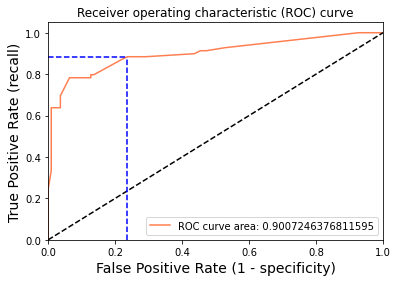

Using a threshold of 0.338 guarantees a sensitivity of 0.884 and a specificity of 0.764, i.e. a false positive rate of 23.64%.


In [294]:
plt.figure()

plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1],'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Need to understand above lines of plotting code. 

plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')

plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))



In [ ]:
# Sensitivty of 1 looks great but FPR of 92.73% looks not so good. 

In [436]:
def evaluate_threshold(threshold):
    print('TPR :', tpr[thr > threshold][-1])
    print('FPR :', fpr[thr > threshold][-1])     

In [442]:
evaluate_threshold(0.30)

TPR : 0.8840579710144928
FPR : 0.23636363636363636


In [437]:
evaluate_threshold(0.50)

TPR : 0.782608695652174
FPR : 0.09090909090909091


In [440]:
evaluate_threshold(0.80)

TPR : 0.5507246376811594
FPR : 0.00909090909090909


In [441]:
evaluate_threshold(0.88)

TPR : 0.391304347826087
FPR : 0.00909090909090909


In [ ]:
# we can see that as we increase the threshold deciding the TPR becomes tighter and tighter and minimizes the FPR also.

In [ ]:
#For our use case i don't know whether this ROC AUC curve helps because we wanted to increase precision and 
# reduce recall but in this curve there is no component related to precision. 


In [ ]:
# Another way of drawing ROC, AUC plot: 

In [387]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Threshold value is: 0.422248967115129


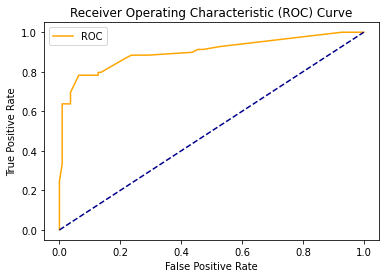

In [389]:
#The optimal cut off would be where tpr is high and fpr is low
#tpr - (1-fpr) is zero or near to zero is the optimal cut off point

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

plot_roc_curve(fpr, tpr)

In [ ]:
# Need to understand if the optimal threshold extractin approch mentioned above is correct or not.
# Also need to understand how to mark that optimal threshold in plot. 

# Precision-Recall Curves

In [447]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predict_prob)

In [448]:
precision[0:5], recall[0:5], thresholds[0:5]

(array([0.40350877, 0.52459016, 0.54782609, 0.55263158, 0.55752212]),
 array([1.        , 0.92753623, 0.91304348, 0.91304348, 0.91304348]),
 array([0.09376084, 0.10762723, 0.13241896, 0.15703494, 0.16917754]))

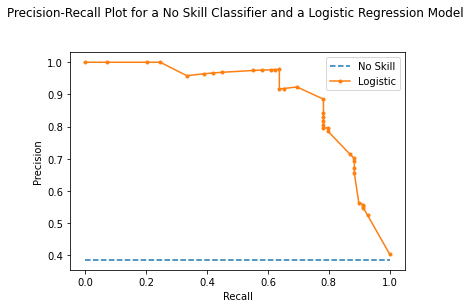

In [449]:
# plot the precision-recall curves

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

plt.plot(recall, precision, marker='.', label='Logistic')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Plot for a No Skill Classifier and a Logistic Regression Model \n\n')

# show the legend
plt.legend()

# show the plot
plt.show()


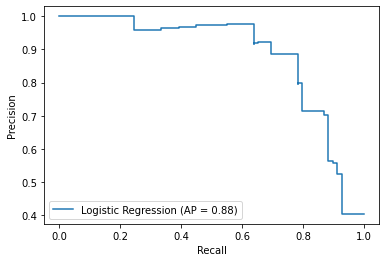

In [384]:
# Another very quick way to plot Precision v/s Recall curve is, 
# Use sklearn to plot precision-recall curves
# This function requires only a classifier (fit on training data) and the test data as inputs.
# The output plots include the AP score i.e Averge Precision Score which is calculated from 
# sklearn.metrics.average_precision_score()

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, X_test, y_test, name = 'Logistic Regression')

In [ ]:
# Need to find the approach to extract optimal threshold (the one mentioned in ROC, AUC not sure if it holds good here)
# Also need to understand how to mark that optimal threshold in plot. 